In [1]:
# Import Libraries and Load data

import pandas as pd
import matplotlib.pyplot as plt

# Load the sales data
sales_data = pd.read_csv("sales_data_5.csv")

# Display the first few rows and insepcting to check for missing values
print(sales_data.head())
print(f"\n{sales_data.isna().sum()}")

  product_id customer_id  customer_age  sales_date  quantity   price
0  Product A     CUST 68          84.0  05-01-2026     133.0  4408.0
1  Product B     CUST 69          81.0  06-01-2026      56.0  9769.0
2  Product C     CUST 70           NaN  07-01-2026      54.0     NaN
3  Product D      CUST 1           NaN  08-01-2026      88.0   795.0
4  Product E      CUST 2          29.0  09-01-2026      44.0  1455.0

product_id      0
customer_id     0
customer_age    3
sales_date      0
quantity        2
price           3
dtype: int64


In [2]:
# First convert the datatype of the coulmn with missing value to numeric so tha mean, median and mode can work

print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    26 non-null     object 
 1   customer_id   26 non-null     object 
 2   customer_age  23 non-null     float64
 3   sales_date    26 non-null     object 
 4   quantity      24 non-null     float64
 5   price         23 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.3+ KB
None


In [3]:
# Convert each column to numeric and handle errors (NaN values)
sales_data['customer_age'] = pd.to_numeric(sales_data['customer_age'], errors='coerce').astype('Int64')
sales_data['price'] = pd.to_numeric(sales_data['price'], errors='coerce').astype('Int64')
sales_data['quantity'] = pd.to_numeric(sales_data['quantity'], errors='coerce').astype('Int64')

print(sales_data[['customer_age', 'price', 'quantity']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   customer_age  23 non-null     Int64
 1   price         23 non-null     Int64
 2   quantity      24 non-null     Int64
dtypes: Int64(3)
memory usage: 834.0 bytes
None


In [4]:
# Filling the missing values with mode, mean, and median

# 'customer_age' - fill with median
sales_data['customer_age'] = sales_data['customer_age'].fillna(sales_data['customer_age'].median())

# 'quantity' - fill with mode (most frequent value)
# mode() returns a Series, use .iloc[0] to access by position (avoids KeyError)
# If no mode exists (all values unique), it will use the first value or we can use median
quantity_mode = sales_data['quantity'].mode()
if len(quantity_mode) > 0:
    sales_data['quantity'] = sales_data['quantity'].fillna(quantity_mode.values[0])
else:
    # If no mode exists (all values are unique), use median instead
    sales_data['quantity'] = sales_data['quantity'].fillna(sales_data['quantity'].median())

# 'price' - fill with mean (rounded to nearest integer)
sales_data['price'] = sales_data['price'].fillna(round(sales_data['price'].mean(), 0))

# filling product_id with only one product, it will be needed for grouping price of product according to month
sales_data['product_id'] = ['Product O' for i in range(len(sales_data))]
print(sales_data['product_id'], end='\n')

# checking if there are still missing values
print(sales_data.isna().sum())
# print(f"\n{sales_data.head()}")

0     Product O
1     Product O
2     Product O
3     Product O
4     Product O
5     Product O
6     Product O
7     Product O
8     Product O
9     Product O
10    Product O
11    Product O
12    Product O
13    Product O
14    Product O
15    Product O
16    Product O
17    Product O
18    Product O
19    Product O
20    Product O
21    Product O
22    Product O
23    Product O
24    Product O
25    Product O
Name: product_id, dtype: object
product_id      0
customer_id     0
customer_age    0
sales_date      0
quantity        0
price           0
dtype: int64


In [5]:
# Convert Date Column to Datetime

sales_data['sales_date'] = pd.to_datetime(sales_data['sales_date'], errors='coerce')

# Verify the data type of the 'Date' column
print(sales_data.dtypes)
print(f'\n{sales_data.head()}')

product_id              object
customer_id             object
customer_age             Int64
sales_date      datetime64[ns]
quantity                 Int64
price                    Int64
dtype: object

  product_id customer_id  customer_age sales_date  quantity  price
0  Product O     CUST 68            84 2026-05-01       133   4408
1  Product O     CUST 69            81 2026-06-01        56   9769
2  Product O     CUST 70            44 2026-07-01        54   4745
3  Product O      CUST 1            44 2026-08-01        88    795
4  Product O      CUST 2            29 2026-09-01        44   1455


In [ ]:
# Sort Data by Date

sales_data = sales_data.sort_values(by='sales_date', ascending=False) # since the datai already in ascending order

# Reset the index
sales_data = sales_data.reset_index(drop=True)

# Display the first few rows of the sorted data
print(sales_data.head())

  product_id customer_id  customer_age sales_date  quantity  price
0  Product O      CUST 5            25 2026-12-01       133   6203
1  Product O      CUST 4            81 2026-11-01       155   5764
2  Product O      CUST 3            44 2026-10-01       171   4289
3  Product O      CUST 2            29 2026-09-01        44   1455
4  Product O      CUST 1            44 2026-08-01        88    795


In [ ]:
# Aggregate Sales Data by Month

sales_by_month = sales_data.groupby(pd.Grouper(key='sales_date', freq='ME'))['price'].sum() # 'M' outdated, use 'ME'

# Convert to DataFrame
sales_by_month = sales_by_month.reset_index()

# Display the aggregated sales data
print(sales_by_month.head())

  sales_date  price
0 2026-05-31   4408
1 2026-06-30   9769
2 2026-07-31   4745
3 2026-08-31    795
4 2026-09-30   1455


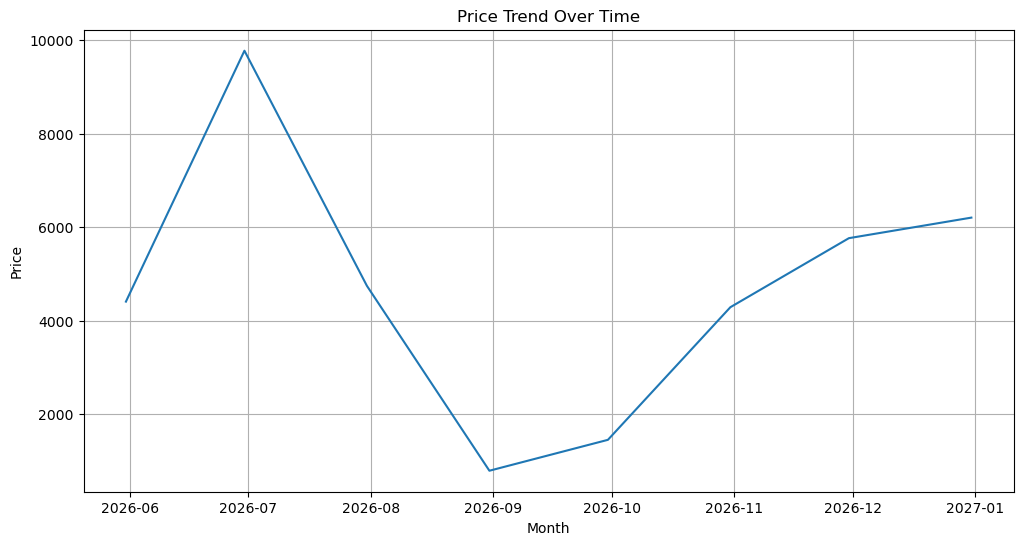

In [ ]:
# Visualize Price Trend Over Time

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month['sales_date'], sales_by_month['price'])
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price Trend Over Time')
plt.grid(True)
plt.show()

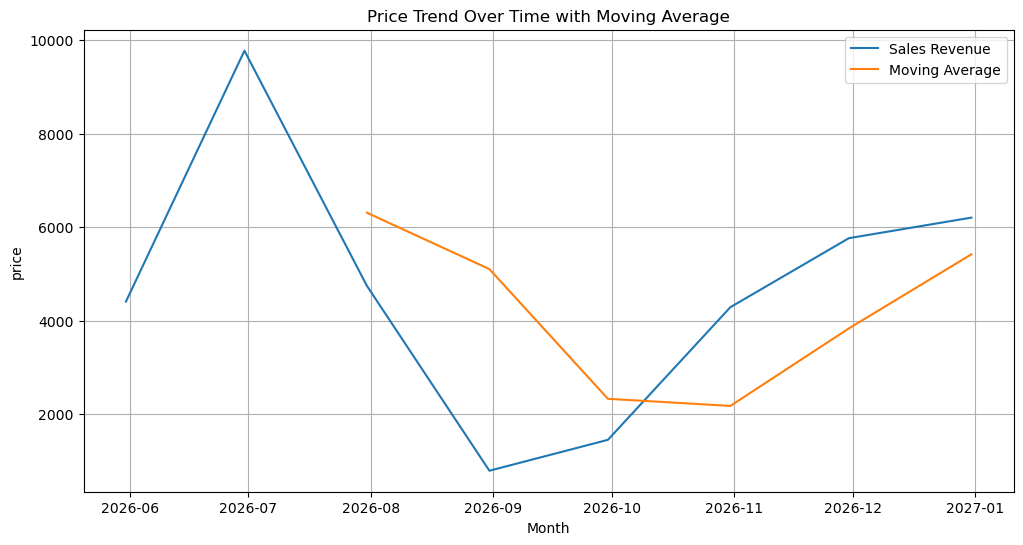

In [9]:
# Calculate a 3-month moving average
sales_by_month['Moving Average'] = sales_by_month['price'].rolling(window=3).mean()

# Create a line chart with moving average
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month['sales_date'], sales_by_month['price'], label='Sales Revenue')
plt.plot(sales_by_month['sales_date'], sales_by_month['Moving Average'], label='Moving Average')
plt.xlabel('Month')
plt.ylabel('price')
plt.title('Price Trend Over Time with Moving Average')
plt.grid(True)
plt.legend()
plt.show()